In [73]:
import autoreload
%reload_ext autoreload
%autoreload

from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
# Functions useful for two thermodynamic interacting systems.
# Ref: Thermal Physics, Daniel Schroeder.
#--------------------------------------------------------

def einstMultip(N,q):
    """ Multiplicity of a given macrostate of Einstein solid model
    - N: number of harmonic oscilators
    - q: number of energy units of the HO (E = qhf)
    """
    n = 1    
    for i in range(1,q+1):
        n *= (i+N-1)/float(i)        
    return n

def einstDistrib(Na,Nb,q):
    """ Distribution of macrostates of two interacting system in an Einstein solid model
    - Na: number of harmonic oscilators of system a
    - Nb: number of harmonic oscilators of system b
    - q: number of energy units of the HO (E = qhf)
    """
    y = [einstMultip(Na,i)*einstMultip(Nb,q-i) for i in range(0,q+1)]
    x = [i for i in range(0,q+1)]
    wt = reduce(lambda a, b: a + b, y, 0)
    return [array(x),array(y),wt]

def einstTable(Na,Nb,q):
    """ Table of macrostates of two interacting system in an Einstein solid model
    - Na: number of harmonic oscilators of system a
    - Nb: number of harmonic oscilators of system b
    - q: number of energy units of the HO (E = qhf)
    """
    wa = [einstMultip(Na,i) for i in range(0,q+1)]
    wb = [einstMultip(Nb,q-i) for i in range(0,q+1)]
    wt = [einstMultip(Na,i)*einstMultip(Nb,q-i) for i in range(0,q+1)]
    w = reduce(lambda a, b: a + b, wt, 0)
    a = [i for i in range(0,q+1)]
    b = [q-i for i in range(0,q+1)]
    tb = {'qa':a,'Wa':wa,'qb':b,'Wb':wb,'Wt':wt, 'P':(array(wt)/float(w))}    
    etab = pd.DataFrame(tb)
    etab = etab.reindex_axis(['qa','Wa','qb','Wb','Wt','P'], axis=1)    
    return etab

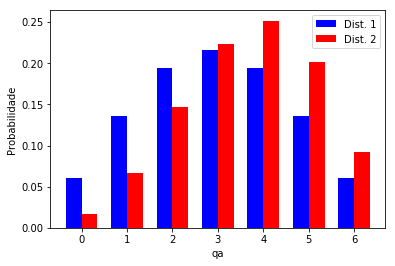

Distribuição 1:


,qa,Wa,qb,Wb,Wt,P
0,0,1.0,6,28.0,28.0,0.060606
1,1,3.0,5,21.0,63.0,0.136364
2,2,6.0,4,15.0,90.0,0.194805
3,3,10.0,3,10.0,100.0,0.216450
4,4,15.0,2,6.0,90.0,0.194805
5,5,21.0,1,3.0,63.0,0.136364
6,6,28.0,0,1.0,28.0,0.060606


Distribuição 2:


,qa,Wa,qb,Wb,Wt,P
0,0,1.0,6,84.0,84.0,0.016783
1,1,6.0,5,56.0,336.0,0.067133
2,2,21.0,4,35.0,735.0,0.146853
3,3,56.0,3,20.0,1120.0,0.223776
4,4,126.0,2,10.0,1260.0,0.251748
5,5,252.0,1,4.0,1008.0,0.201399
6,6,462.0,0,1.0,462.0,0.092308


In [75]:
#Exercício 2.9 - Thermal Physics - Daniel Schroeder
#--------------------------------------------------

#Distribuição 1:
Na1 = 3
Nb1 = 3
q1 = 6
dist1 = einstDistrib(Na1,Nb1,q1)

#Distribuição 2:
Na2 = 6
Nb2 = 4
q2 = 6
dist2 = einstDistrib(Na2,Nb2,q2)

#Gerar tabelas:
tb1 = einstTable(Na1,Nb1,q1)
tb2 = einstTable(Na2,Nb2,q2)

#Plotar dados:
fig, ax = plt.subplots()
larg = 0.35
g1 = plt.bar(dist1[0]-larg/2, dist1[1]/float(dist1[2]), larg,
            color='b',
            label='Dist. 1')
g2 = plt.bar(dist2[0]+larg/2, dist2[1]/float(dist2[2]), larg,
            color='r',
            label='Dist. 2')
plt.xlabel('qa')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

print('Distribuição 1:')
display(tb1)
print('Distribuição 2:')
display(tb2)

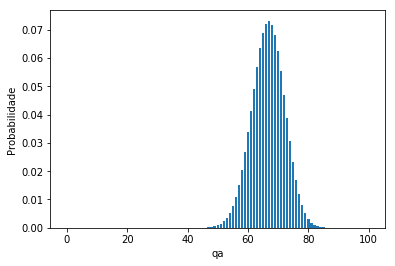

Distribuição:


,qa,Wa,qb,Wb,Wt,P
0,0,1.000000e+00,100,4.527426e+58,4.527426e+58,2.692667e-38
1,1,2.000000e+02,99,2.275088e+58,4.550177e+60,2.706198e-36
2,2,2.010000e+04,98,1.137544e+58,2.286464e+62,1.359864e-34
3,3,1.353400e+06,97,5.658849e+57,7.658686e+63,4.554970e-33
4,4,6.868505e+07,96,2.800553e+57,1.923561e+65,1.144030e-31
5,5,2.802350e+09,95,1.378734e+57,3.863694e+66,2.297915e-30
6,6,9.574696e+10,94,6.751531e+56,6.464386e+67,3.844665e-29
7,7,2.817696e+12,93,3.288310e+56,9.265460e+68,5.510592e-28
8,8,7.290789e+13,92,1.592775e+56,1.161259e+70,6.906537e-27
9,9,1.684982e+15,91,7.672007e+55,1.292720e+71,7.688394e-26


qa mais provavel:  67
Prob. do qa mais provavel:  0.073151397822


In [76]:
#Exercício 2.10 - Thermal Physics - Daniel Schroeder
#--------------------------------------------------

#Distribuição:
Na = 200
Nb = 100
q = 100
dist = einstDistrib(Na,Nb,q)

#Gerar tabelas:
tb = einstTable(Na,Nb,q)

#Plotar dados:
plt.bar(dist[0], dist[1]/float(dist[2]))
plt.xlabel('qa')
plt.ylabel('Probabilidade')
plt.show()

print('Distribuição:')
display(tb)

print 'qa mais provavel: ' , dist[0][argmax(dist[1])]
print 'Prob. do qa mais provavel: ' , dist[1][argmax(dist[1])]/float(dist[2])

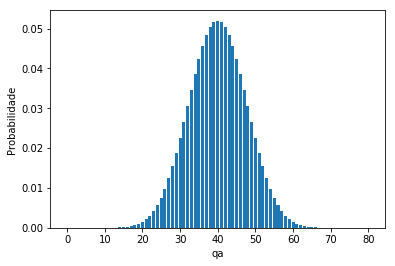

Distribuição:


,qa,Wa,qb,Wb,Wt,P
0,0,1.000000e+00,80,5.359834e+20,5.359834e+20,1.585363e-12
1,1,2.100000e+01,79,4.287867e+20,9.004521e+21,2.663410e-11
2,2,2.310000e+02,78,3.421631e+20,7.903968e+22,2.337882e-10
3,3,1.771000e+03,77,2.723339e+20,4.823034e+23,1.426585e-09
4,4,1.062600e+04,76,2.161826e+20,2.297156e+24,6.794664e-09
5,5,5.313000e+04,75,1.711446e+20,9.092910e+24,2.689554e-08
6,6,2.302300e+05,74,1.351141e+20,3.110732e+25,9.201107e-08
7,7,8.880300e+05,73,1.063664e+20,9.445658e+25,2.793892e-07
8,8,3.108105e+06,72,8.349193e+19,2.595017e+26,7.675693e-07
9,9,1.001500e+07,71,6.534151e+19,6.543956e+26,1.935610e-06


qa mais provavel:  40
Prob. do qa mais provavel:  0.0519741934499
qa menos provavel:  0
Prob. do qa menos provavel:  1.58536309851e-12


In [77]:
#Exercício 2.11 - Thermal Physics - Daniel Schroeder
#--------------------------------------------------

# Para os dipolos magnéticos podemos usar as funções do sólido de Einstein com a
# seguinte substituição: N -> N-n+1
# Sendo que a interpretação para q -> n é o número de dipolos anti-alinhados.

#Distribuição:
Na = 100
Nb = 100
q = 80
dist = einstDistrib(Na-q+1,Nb-q+1,q)

#Gerar tabelas:
tb = einstTable(Na-q+1,Nb-q+1,q)

#Plotar dados:
plt.bar(dist[0], dist[1]/float(dist[2]))
plt.xlabel('qa')
plt.ylabel('Probabilidade')
plt.show()

print('Distribuição:')
display(tb)

print 'qa mais provavel: ' , dist[0][argmax(dist[1])]
print 'Prob. do qa mais provavel: ' , dist[1][argmax(dist[1])]/float(dist[2])
print 'qa menos provavel: ' , dist[0][argmin(dist[1])]
print 'Prob. do qa menos provavel: ' , dist[1][argmin(dist[1])]/float(dist[2])